# THE CHALENGE  - Titanic Data

### Source :  Kaggle Competition

In [283]:
### import your necessary libraries

import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_absolute_error,accuracy_score, mean_squared_error,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import MinMaxScaler


import joblib

In [254]:
### Let us load our data

data = pd.read_csv('titanic_data.csv')

# DATA DICTIONARY

The Data Dictionary shows the columns and their meanings in our Titanic Dataset

You can always refer to it

# Define your Objective



# QUESTIONS

#### QUESTION 1  
#### Who is the oldest passenger and how old is (s)he?

In [255]:
data["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

80 yrs

#### QUESTION 2
#### From which City did a lot of passengers board the ship?
#### You could give a graphical representation of this

In [256]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Southampton

# Preprocessing / Data Cleaning


#### Tips

Check for null values

Make sure to fill them with an appropriate metric

drop columns that wont be necessary for predicting the survival of a passenger

In [257]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [258]:
# fill null ages with mean age

mean_age = data["Age"].mean()
mean_age = int(mean_age)

data["Age"].fillna(mean_age, inplace=True)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [259]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [260]:
# necessary cols => [Survival, Pclass, Sex, Age, Fare]

ml_data = data.drop(["Name", "PassengerId", "SibSp", "Parch", "Ticket", "Cabin"], axis=1)
ml_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [261]:
ml_data["Sex"].unique()

array(['male', 'female'], dtype=object)

# Exploratory Data Analysis (EDA)

Explore your data for meaningful insights

#### QUESTION 3
#### What can you say about the Gender / Sex of passengers and their Survival rate?

##### Hint:    you could use the groupby() function

In [262]:
ml_data.groupby("Sex").count()['Survived']

Sex
female    314
male      577
Name: Survived, dtype: int64

Majority of the survivors were male

#### QUESTION 4
#### What can you say about the Passenger Class and their Survival rate?

##### Hint:    you could use the groupby() function

In [263]:
ml_data.groupby("Pclass").count()['Survived']

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

Those in class 3 were the most

#### QUESTION 5
#### Show a Distribution of the spread of male and female passengers with reagards to Age?

##### Hint:    you could use a Boxplot

#### Give a comment based on your results

<AxesSubplot:xlabel='Sex', ylabel='Age'>

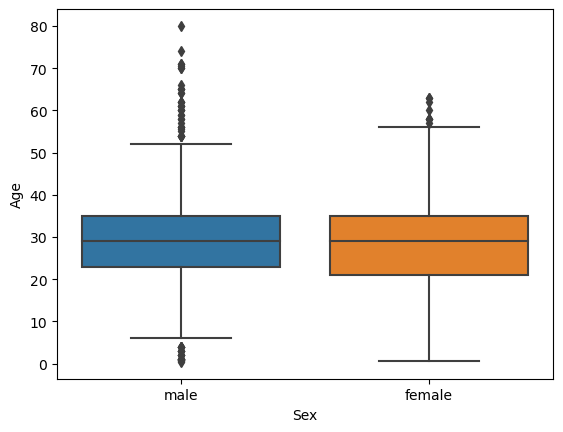

In [264]:
sns.boxplot(x="Sex", y="Age", data=ml_data)

### Encoding
In classification, categories are normally changed to numerical values

Because not all algorithms can deal with non-numeric categories

In [265]:
#### Creating an instance of our encoder

le = LabelEncoder()

In [266]:
##### Convert the textual categorical columns that are necessary for your prediction into numerical categories

ml_data["Sex"] = le.fit_transform(ml_data["Sex"])
ml_data["Embarked"] = le.fit_transform(ml_data["Embarked"])

# 0 = Female
# 1 = Male
ml_data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


Choosing our target and predictors




In [267]:
# Target = Survived
y = ml_data["Survived"]

# Predictors = [Pclass, Sex, Age, Fare], Embarked?
X = ml_data.drop(["Survived"], axis=1)

In [268]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked'], dtype='object')

Splitting our data into test and train

In [269]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Building our classification model


In [270]:
#### Build your model

model_log = LogisticRegression()

model_knn = KNeighborsClassifier(n_neighbors=3)

model_linear = LinearRegression()

In [271]:
model_log.fit(X_train, y_train)

model_knn.fit(X_train, y_train)

model_linear.fit(X_train, y_train)

LinearRegression()

In [272]:
#### Do a prediction with your test data

In [273]:
y_pred_log = model_log.predict(X_test)

y_pred_knn = model_knn.predict(X_test)

y_pred_linear = model_linear.predict(X_test)

/home/aceix/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [274]:
y_pred_log

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [275]:
y_pred_knn

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1])

In [276]:
y_pred_linear

array([ 0.16606943,  0.23233577,  0.1089122 ,  0.82897668,  0.72387245,
        0.91905406,  0.62080193,  0.12443475,  0.67046589,  0.94453707,
        0.37581956,  0.01722788,  0.57554399,  0.162057  ,  0.21329412,
        0.95631217,  0.35670497,  0.62080383,  0.24767687,  0.33759017,
        0.09363029,  0.38664453,  0.61332517,  0.10894334,  0.07468695,
        0.14759371,  0.45511536,  0.23239565,  0.17051554,  0.56748151,
        0.11273181,  0.60186176,  0.49720997,  0.57511484,  0.11655581,
        0.17369108,  0.40978074,  0.62080193,  0.99399131,  0.07452876,
        0.27204784,  0.0745084 ,  0.07453245,  0.12020757,  0.60551995,
        0.12482698,  0.1127381 ,  0.09748243,  0.09361003,  0.38839914,
        0.75844721,  0.82007705,  0.03298457,  0.47674994, -0.0173234 ,
        0.94963566,  0.22851546,  0.92277151,  0.71790041,  0.65900807,
        0.10508831,  0.80191118,  0.74476231,  0.40573108,  0.12020757,
        0.6336022 ,  0.27204784,  0.07452826,  0.21172106,  0.91

In [277]:
#### Evaluate your model


In [278]:
##### ACCURACY

accuracy_score(y_test, y_pred_log)

0.7988826815642458

In [279]:
accuracy_score(y_test, y_pred_knn)

0.7318435754189944

In [284]:
r2 = r2_score(y_test, y_pred)
print("R-squared value:", r2)

R-squared value: 0.17065637065637063


In [ ]:
#### Confusion Matrix

cnf_matrix = confusion_matrix(y_test, y_pred_log)

<AxesSubplot:>

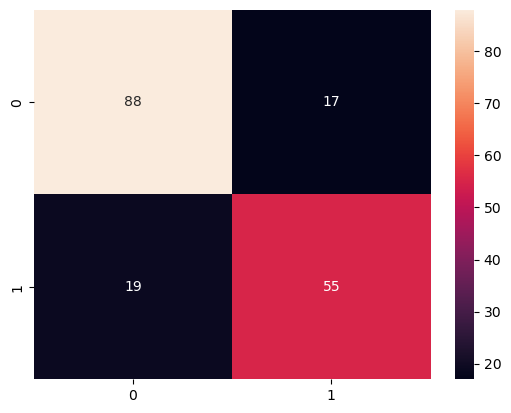

In [ ]:
sns.heatmap(cnf_matrix, annot=True, fmt="d")

### Extra analysis

Use elbow method for KNN

In [ ]:
error_rate = []

for i in range(1, 30):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred_i = knn.predict(X_test)
  error_rate.append(np.mean(pred_i != y_test))


Text(0, 0.5, 'Error Rate')

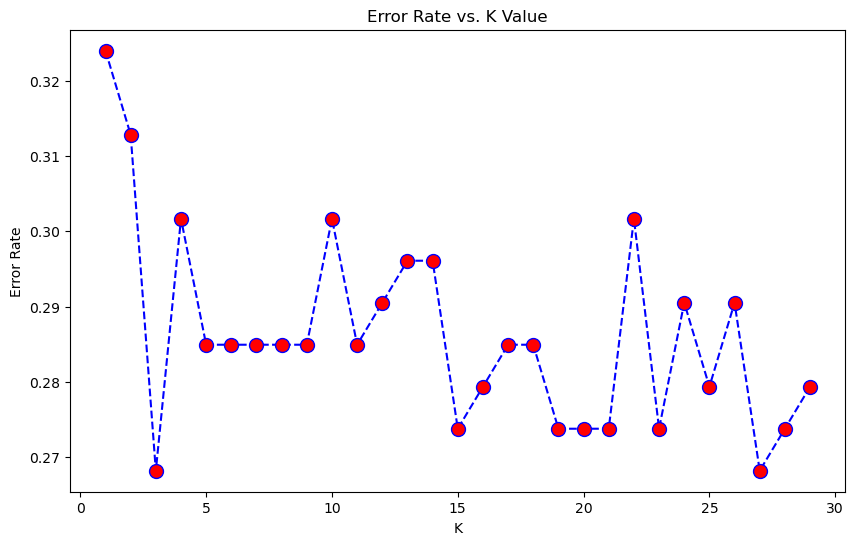

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


#### Conclusion

Logistic Regression is the best model for this dataset

accuracy = 0.7988826815642458